# Credit Card Fraudulent Transaction Detection 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score,classification_report
import matplotlib.pyplot as plt
from collections import Counter
import itertools

In [2]:
# Loading the csv file

df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Performing Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Checking for null values

df.isnull().values.any()

False

In [5]:
df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [6]:
non_fraudulent_len = len(df[df.Class == 0])
fraudulent_len = len(df[df.Class == 1])
fraudulent_percent = (fraudulent_len / (fraudulent_len + non_fraudulent_len)) * 100


print("Total number of Fraud transactions: ", fraudulent_len)
print("Total number of Genuine transactions: ", non_fraudulent_len)
print("Fraud transactions % : {:.4f}".format(fraudulent_percent))

Total number of Fraud transactions:  492
Total number of Genuine transactions:  284315
Fraud transactions % : 0.1727


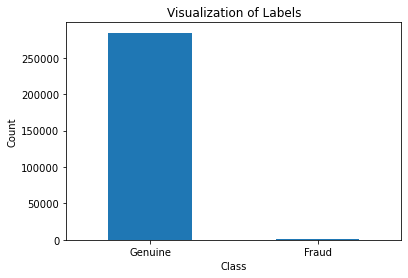

In [7]:
# Visualize the "Labels" column in our dataset

labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [8]:
fraud = df[df.Class == 1]
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
nonfraud = df[df.Class == 0]
nonfraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

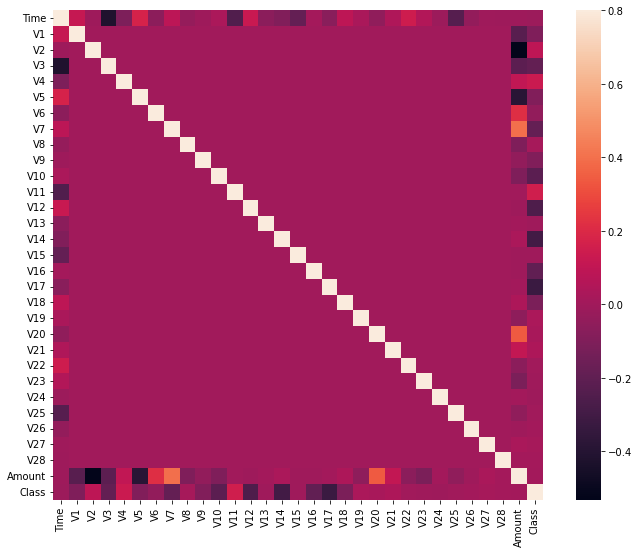

In [10]:

# Correlation matrix
import seaborn as sns
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.show()

In [11]:
# Perform Scaling
scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df.drop(["Amount","Time"], inplace= True, axis= 1)

Y = df["Class"]
X = df.drop(["Class"], axis= 1)

In [12]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [13]:
# Split the data
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


In [14]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)

predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100

In [15]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(train_X, train_Y)

predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

In [16]:
#KNN Algorithm
n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(train_X, train_Y)
predictions_knn = knn.predict(test_X)
knn_score=knn.score(test_X, test_Y) * 100

In [17]:
#Logistic Regression

lr = LogisticRegression()
lr.fit(train_X, train_Y)
predictions_lr = lr.predict(test_X)
lr_score=lr.score(test_X, test_Y) * 100

In [18]:
# Printing scores of our classifiers

print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)
print("KNN Score: ", knn_score)
print("Logistic Regression: ",lr_score)

Random Forest Score:  99.96137776061234
Decision Tree Score:  99.91807403766254
KNN Score:  99.94733330992591
Logistic Regression:  99.92626663389628


In [19]:
# The below function is directly taken from the scikit-learn website to plot the confusion matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function will print and plot the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [20]:
# Ploting confusion matrix for Decision Trees

confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[85263    44]
 [   26   110]]


Confusion matrix, without normalization


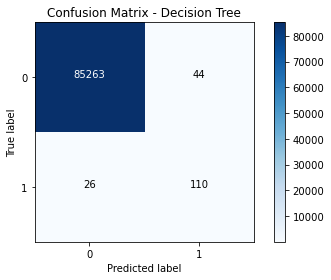

In [21]:
plot_confusion_matrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Decision Tree")

In [22]:
# Ploting confusion matrix for Random Forests

confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[85300     7]
 [   26   110]]


Confusion matrix, without normalization


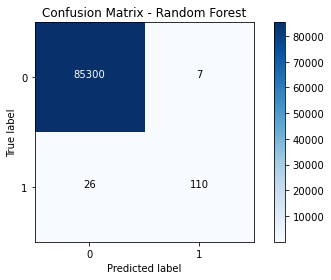

In [23]:
plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title= "Confusion Matrix - Random Forest")

In [24]:
# Ploting confusion matrix for KNN

confusion_matrix_knn = confusion_matrix(test_Y, predictions_knn.round())
print("Confusion Matrix - KNN")
print(confusion_matrix_knn)

Confusion Matrix - KNN
[[85293    14]
 [   31   105]]


Confusion matrix, without normalization


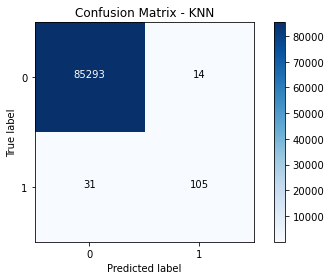

In [25]:
plot_confusion_matrix(confusion_matrix_knn, classes=[0, 1], title= "Confusion Matrix - KNN")

In [26]:
# Ploting confusion matrix for Logistic regression

confusion_matrix_lr = confusion_matrix(test_Y, predictions_lr.round())
print("Confusion Matrix - Logistic Regression")
print(confusion_matrix_lr)

Confusion Matrix - Logistic Regression
[[85295    12]
 [   51    85]]


Confusion matrix, without normalization


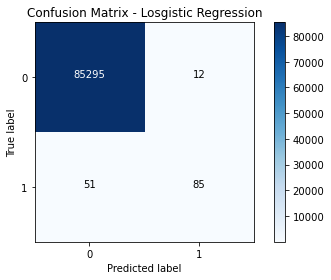

In [27]:
plot_confusion_matrix(confusion_matrix_lr, classes=[0, 1], title= "Confusion Matrix - Losgistic Regression")

In [28]:
# The below function will print the following metrics

def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))
    print(f"Classification Report :- \n {classification_report(actuals, predictions)}")

In [29]:
print("Decision Tree Model")
print()
metrics(test_Y, predictions_dt.round())

Decision Tree Model

Accuracy: 0.99918
Precision: 0.71429
Recall: 0.80882
F1-score: 0.75862
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.71      0.81      0.76       136

    accuracy                           1.00     85443
   macro avg       0.86      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [30]:
print("Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

Random Forest Model

Accuracy: 0.99961
Precision: 0.94017
Recall: 0.80882
F1-score: 0.86957
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.81      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [31]:
print("KNN Model")
print()
metrics(test_Y, predictions_knn.round())

KNN Model

Accuracy: 0.99947
Precision: 0.88235
Recall: 0.77206
F1-score: 0.82353
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.77      0.82       136

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [32]:
print("Evaluation of Logistic Regression")
print()
metrics(test_Y, predictions_lr.round())

Evaluation of Logistic Regression

Accuracy: 0.99926
Precision: 0.87629
Recall: 0.62500
F1-score: 0.72961
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.62      0.73       136

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



Random Forest provides better results as compared to Decision Tree

After observing we can see that our dataset has class imabalance problem.
Non-Fraudulent transactions are higher than 99% and the fraudulent transactions are only 0.17%.

We can take care of class imbalance problem by doing over sampling.

For this we can use SMOTE (Synthetic Minority Oversampling technique).

In [34]:
# Performing oversampling on RF and DT

from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (568630, 29)
Resampled shape of Y:  (568630,)
Counter({0: 284315, 1: 284315})


In [35]:
# Building the Random Forest classifier on the new dataset

rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(train_X, train_Y)

predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100

In [36]:
# Visualizing the confusion matrix

cm_resampled = confusion_matrix(test_Y, predictions_resampled.round())
print("Confusion Matrix - Random Forest")
print(cm_resampled)

Confusion Matrix - Random Forest
[[85130    19]
 [    0 85440]]


Confusion matrix, without normalization


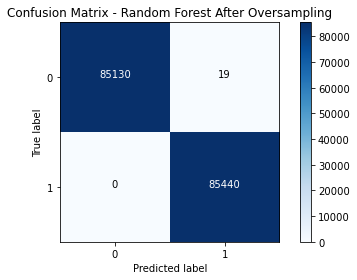

In [37]:
plot_confusion_matrix(cm_resampled, classes=[0, 1], title= "Confusion Matrix - Random Forest After Oversampling")

In [38]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_resampled.round())

Evaluation of Random Forest Model

Accuracy: 0.99989
Precision: 0.99978
Recall: 1.00000
F1-score: 0.99989
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



We can see that after doing over sampling our Random Forest with SMOTE provides better results as compared to the Random Forest without SMOTE.